<a href="https://colab.research.google.com/github/IAMLATI/Patient-DNA-Hospital-Appointment/blob/main/Patient_Dna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hospital DNA Appointment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/hospital_appointment_no_show_5000.csv")

In [ ]:
df.head()

,patient_id,age,gender,city_type,distance_km,travel_time_min,appointment_day,appointment_time_slot,department,waiting_days,...,chronic_disease,sms_reminder,email_reminder,num_reminders,employment_status,education_level,insurance_status,rainy_day,public_holiday,no_show
0,1,47.0,Female,Suburban,16.5,77.3,Sat,Evening,Pediatrics,8,...,0,1,0.0,1,NaN,Higher,Uninsured,1,0,1
1,2,37.0,Male,Suburban,6.7,26.9,Tue,Morning,Cardiology,8,...,1,1,0.0,2,Employed,Secondary,Insured,0,1,0
2,3,49.0,Female,Rural,8.2,46.1,Sat,Evening,General Medicine,3,...,0,1,0.0,1,Unemployed,Secondary,Insured,0,0,1
3,4,62.0,Female,Urban,2.6,15.2,Thu,Evening,General Medicine,12,...,1,0,1.0,1,NaN,Secondary,Insured,0,0,0
4,5,36.0,Female,Suburban,4.1,13.8,Fri,Morning,Dermatology,8,...,0,1,0.0,1,NaN,Secondary,Insured,0,0,1


In [ ]:
df.shape

(5000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             5000 non-null   int64  
 1   age                    4610 non-null   float64
 2   gender                 5000 non-null   object 
 3   city_type              5000 non-null   object 
 4   distance_km            4612 non-null   float64
 5   travel_time_min        4584 non-null   float64
 6   appointment_day        5000 non-null   object 
 7   appointment_time_slot  5000 non-null   object 
 8   department             5000 non-null   object 
 9   waiting_days           5000 non-null   int64  
 10  previous_appointments  5000 non-null   int64  
 11  previous_no_shows      5000 non-null   int64  
 12  diabetes               5000 non-null   int64  
 13  hypertension           5000 non-null   int64  
 14  chronic_disease        5000 non-null   int64  
 15  sms_

In [ ]:
df.describe()

,patient_id,age,distance_km,travel_time_min,waiting_days,previous_appointments,previous_no_shows,diabetes,hypertension,chronic_disease,sms_reminder,email_reminder,num_reminders,rainy_day,public_holiday,no_show
count,5000.000000,4610.000000,4612.000000,4584.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4560.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,39.643167,8.310169,41.967779,6.990600,2.005600,0.40180,0.186200,0.287200,0.476400,0.706800,0.401535,1.404200,0.207000,0.099800,0.50000
std,1443.520003,14.925693,4.604878,23.271754,2.671917,1.423227,0.64687,0.389307,0.452501,0.499493,0.455275,0.490263,0.814466,0.405196,0.299763,0.50005
min,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,30.000000,4.800000,23.600000,5.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,2500.500000,40.000000,8.100000,40.700000,7.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.50000
75%,3750.250000,49.750000,11.400000,57.525000,9.000000,3.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.00000
max,5000.000000,90.000000,30.400000,128.400000,21.000000,9.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000


In [ ]:
df.isnull().sum()

,0
patient_id,0
age,390
gender,0
city_type,0
distance_km,388
travel_time_min,416
appointment_day,0
appointment_time_slot,0
department,0
waiting_days,0


In [ ]:
missing_data = ((df.isnull().sum() * 100) / 5000).to_frame("Missing data percentage")

In [ ]:
missing_data

,Missing data percentage
patient_id,0.00
age,7.80
gender,0.00
city_type,0.00
distance_km,7.76
travel_time_min,8.32
appointment_day,0.00
appointment_time_slot,0.00
department,0.00
waiting_days,0.00


In [ ]:
missing_columns = missing_data.iloc[:, 0].sort_values(ascending=False)
missing_columns

,Missing data percentage
email_reminder,8.80
travel_time_min,8.32
education_level,7.82
age,7.80
distance_km,7.76
employment_status,7.76
city_type,0.00
patient_id,0.00
appointment_time_slot,0.00
appointment_day,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             5000 non-null   int64  
 1   age                    4610 non-null   float64
 2   gender                 5000 non-null   object 
 3   city_type              5000 non-null   object 
 4   distance_km            4612 non-null   float64
 5   travel_time_min        4584 non-null   float64
 6   appointment_day        5000 non-null   object 
 7   appointment_time_slot  5000 non-null   object 
 8   department             5000 non-null   object 
 9   waiting_days           5000 non-null   int64  
 10  previous_appointments  5000 non-null   int64  
 11  previous_no_shows      5000 non-null   int64  
 12  diabetes               5000 non-null   int64  
 13  hypertension           5000 non-null   int64  
 14  chronic_disease        5000 non-null   int64  
 15  sms_

The maximum percentage of the missing data is eight (8) percent, dropping that might unnecessaily reduce the dataset.

The best approach is to fill the missing data

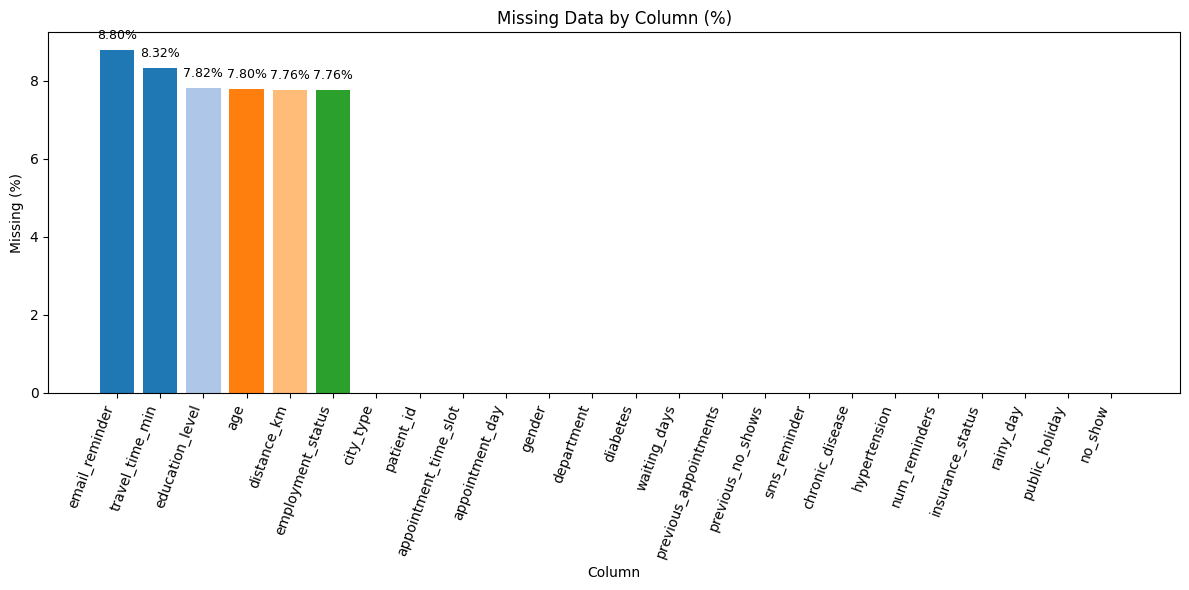

In [ ]:
missing_data = ((df.isnull().sum() * 100) / len(df)).to_frame("Missing data percentage")
missing_series = missing_data.iloc[:, 0].sort_values(ascending=False)

N = len(missing_series)
cmap = cm.get_cmap('tab20', N)
colors = [cmap(i) for i in range(N)]

plt.figure(figsize=(12, 6))
bars = plt.bar(missing_series.index.astype(str), missing_series.values.astype(float), color=colors)
plt.title("Missing Data by Column (%)")
plt.xlabel("Column")
plt.ylabel("Missing (%)")
plt.xticks(rotation=70, ha="right")

for bar, val in zip(bars, missing_series.values):
    if np.isfinite(val) and val > 0:
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.2,
                 f"{val:.2f}%",
                 ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
numerical_features = [ feature for feature in df.columns if df[feature].dtype != "object"]
numerical_features

['patient_id',
 'age',
 'distance_km',
 'travel_time_min',
 'waiting_days',
 'previous_appointments',
 'previous_no_shows',
 'diabetes',
 'hypertension',
 'chronic_disease',
 'sms_reminder',
 'email_reminder',
 'num_reminders',
 'rainy_day',
 'public_holiday',
 'no_show']

In [ ]:
categorical_features = [ feature for feature in df.columns if df[feature].dtype == "object"]
categorical_features

['gender',
 'city_type',
 'appointment_day',
 'appointment_time_slot',
 'department',
 'employment_status',
 'education_level',
 'insurance_status']

In [74]:
count = 0
for i in numerical_features:
  count +=1
print(f' Numerical Features are: {count}')

count_cat= 0
for i in categorical_features:
  count_cat +=1
print(f' Categorical features are : {count_cat}')

 Numerical Features are: 16
 Categorical features are : 8


Numer

In [75]:
df['gender'].value_counts()

,count
gender,
Male,2559
Female,2441


In [83]:
for i in categorical_features:
  print(df[i].value_counts())

gender
Male      2559
Female    2441
Name: count, dtype: int64
city_type
Urban       2515
Suburban    1477
Rural       1008
Name: count, dtype: int64
appointment_day
Tue    875
Fri    853
Sat    847
Thu    826
Wed    801
Mon    798
Name: count, dtype: int64
appointment_time_slot
Morning      1713
Evening      1661
Afternoon    1626
Name: count, dtype: int64
department
Cardiology          1031
Pediatrics          1018
Orthopedics         1018
General Medicine     970
Dermatology          963
Name: count, dtype: int64
employment_status
Employed      2574
Student       1179
Unemployed     859
Name: count, dtype: int64
education_level
Secondary    2323
Higher       1357
Primary       929
Name: count, dtype: int64
insurance_status
Insured      3675
Uninsured    1325
Name: count, dtype: int64


In [84]:
df['employment_status'].fillna(df['employment_status'].mode(), inplace = True)
df['email_reminder'].fillna(df['email_reminder'].mean(), inplace = True)
df['travel_time_min'].fillna(df['travel_time_min'].mean(), inplace = True)
df['distance_km'].fillna(df['distance_km'].mean(), inplace = True)
df['age'].fillna(df['age'].mean(), inplace = True)

In [93]:

df['employment_status'].fillna(df['employment_status'].mode().iloc[0], inplace = True)
df['education_level'].fillna(df['education_level'].mode().iloc[0], inplace = True)



In [94]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
city_type,0
distance_km,0
travel_time_min,0
appointment_day,0
appointment_time_slot,0
department,0
waiting_days,0


Counts of attended vs did not attend:
no_show
Did not attend    2500
Attended          2500
Name: count, dtype: int64


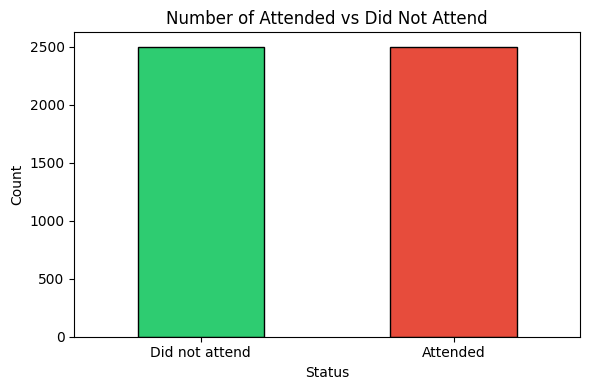

In [106]:
counts = df['no_show'].value_counts().rename({0: 'Attended', 1: 'Did not attend'})
print("Counts of attended vs did not attend:")
print(counts)

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['#2ECC71', '#E74C3C'], edgecolor='black')
plt.title('Number of Attended vs Did Not Attend')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## **We have a balance target dataset**

In [111]:
gb = df.groupby('gender')['no_show'].value_counts()
gb = gb.rename(index={0: "Attended", 1: "Did not attend"})
gb

gender  no_show       
Female  Attended          1240
        Did not attend    1201
Male    Did not attend    1299
        Attended          1260
Name: count, dtype: int64

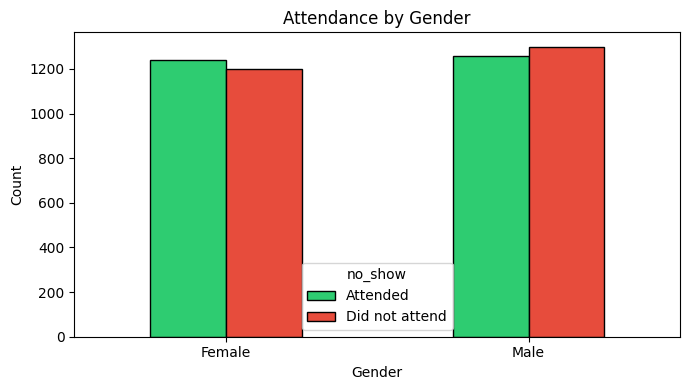

In [115]:

ct = pd.crosstab(df['gender'], df['no_show'])
ct = ct.rename(columns={0: 'Attended', 1: 'Did not attend'})
ax = ct[['Attended', 'Did not attend']].plot(kind='bar', figsize=(7, 4), edgecolor='black', color=['#2ECC71', '#E74C3C'])
ax.set_title('Attendance by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observation:
Females attended more their appointment more than male.
Whilst Male has higher DNA record

In [122]:
df['age'] = df['age'].astype(int)

In [123]:
bins = [0, 12, 17, 24, 64, np.inf]
labels = ['Child', 'Adolescent', 'Young Adult', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, right = True)
print(df[['age', 'age_group']].head(20))


    age    age_group
0    47        Adult
1    37        Adult
2    49        Adult
3    62        Adult
4    36        Adult
5    36        Adult
6    63        Adult
7    51        Adult
8    32        Adult
9    48        Adult
10   33        Adult
11   33        Adult
12   39        Adult
13   11        Child
14   14   Adolescent
15   31        Adult
16   24  Young Adult
17   44        Adult
18   26        Adult
19   18  Young Adult


In [127]:
age_gb = df.groupby('age_group')['no_show'].value_counts()
age_gb.rename(index={0: 'Attended', 1: "Not Attended"})

age_group    no_show     
Child        Not Attended      80
             Attended          65
Adolescent   Not Attended      80
             Attended          69
Young Adult  Attended         200
             Not Attended     193
Adult        Attended        2039
             Not Attended    2021
Senior       Attended         114
             Not Attended     111
Name: count, dtype: int64

In [134]:
age_gb_percentage = df.groupby('age_group')['no_show'].mean() * 100
age_gb_percentage

,no_show
age_group,
Child,55.172414
Adolescent,53.691275
Young Adult,49.109415
Adult,49.778325
Senior,49.333333


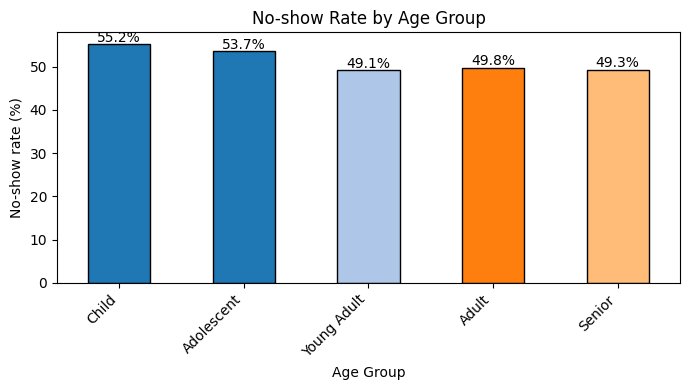

In [136]:
cmap = cm.get_cmap('tab20', N)
colors = [cmap(i) for i in range(N)]
ax = age_gb_percentage.plot(kind='bar', figsize=(7, 4), edgecolor='black', color = colors)
ax.set_title('No-show Rate by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('No-show rate (%)')
for i, v in enumerate(age_gb_percentage):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# **Children and Adolescent had over 50 percent of DNA appointment, highly due to their parent not bringing them to the hospital**

In [137]:
df.head()

,patient_id,age,gender,city_type,distance_km,travel_time_min,appointment_day,appointment_time_slot,department,waiting_days,...,sms_reminder,email_reminder,num_reminders,employment_status,education_level,insurance_status,rainy_day,public_holiday,no_show,age_group
0,1,47,Female,Suburban,16.5,77.3,Sat,Evening,Pediatrics,8,...,1,0.0,1,Employed,Higher,Uninsured,1,0,1,Adult
1,2,37,Male,Suburban,6.7,26.9,Tue,Morning,Cardiology,8,...,1,0.0,2,Employed,Secondary,Insured,0,1,0,Adult
2,3,49,Female,Rural,8.2,46.1,Sat,Evening,General Medicine,3,...,1,0.0,1,Unemployed,Secondary,Insured,0,0,1,Adult
3,4,62,Female,Urban,2.6,15.2,Thu,Evening,General Medicine,12,...,0,1.0,1,Employed,Secondary,Insured,0,0,0,Adult
4,5,36,Female,Suburban,4.1,13.8,Fri,Morning,Dermatology,8,...,1,0.0,1,Employed,Secondary,Insured,0,0,1,Adult


In [138]:
age_gb = df.groupby('appointment_day')['no_show'].value_counts()
age_gb.rename(index={0: 'Attended', 1: "Not Attended"})

appointment_day  no_show     
Fri              Attended        427
                 Not Attended    426
Mon              Attended        410
                 Not Attended    388
Sat              Not Attended    425
                 Attended        422
Thu              Not Attended    430
                 Attended        396
Tue              Not Attended    443
                 Attended        432
Wed              Attended        413
                 Not Attended    388
Name: count, dtype: int64

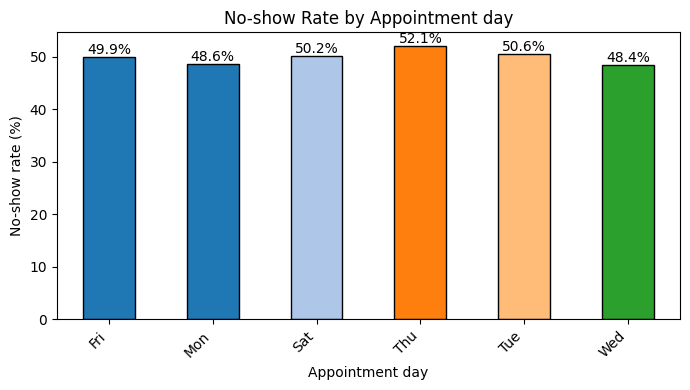

In [139]:
cmap = cm.get_cmap('tab20', N)
colors = [cmap(i) for i in range(N)]
app_day_gb = df.groupby('appointment_day')['no_show'].mean()*100

ax = app_day_gb.plot(kind='bar', figsize=(7, 4), edgecolor='black', color = colors)
ax.set_title('No-show Rate by Appointment day')
ax.set_xlabel('Appointment day')
ax.set_ylabel('No-show rate (%)')
for i, v in enumerate(app_day_gb):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# **Thursday is the day with the highest DNA**